## MNS_Practical 4: Leonard Hollander

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Analytical Solutions to ODEs

Part a:

\begin{align*}
\frac{dy}{dx} &= -y\\
\frac{1}{y}dy &= -dx\\
\int_0^x \frac{1}{y}dy &= -\int_0^t 1dt\\
\ln(y) - ln(x_0) &= -t\\
e^{\ln(y)} &= -e^{-x + ln(x_0)}\\
y &= -x_0e^{-x}\\
y &\stackrel{x_0 = 1}{=} -e^{-x}
\end{align*}

Part b:

\begin{align*}
\frac{dy}{dx} &= \frac{1}{y}\\
\int ydy &= \int dx\\
\frac{1}{2} y^2 &= x + x_0\\
y &= \sqrt{2x + 2}\\
\end{align*}

Part c:

\begin{align*}
\frac{dy}{dx} &= 1 - y\\
\frac{1}{1-y}dy &= dx\\
\int \frac{1}{1-y}dy &= \int 1dx\\
-\ln(1-y) &= x + x_0\\
e^{\ln(1-y)}&\stackrel{x_0 = 0}{=} -x\\
1-y &= e^{-x}\\
y &= -e^{-x} + 1\\
\end{align*}



## 2. Numerical Solutions to ODEs

In [1]:
#Part (a):

def euler(f_func, x_0, t_max, dt, eta = 0.4):
    
    x = x_0
    nsteps = int(t_max / dt)
    xs = np.zeros(nsteps)
    xs[0] = x_0
    i = 1
    t = 0
    
    while i < nsteps:
        
        x = x + eta * f_func(x,t)*dt
        xs[i] = x
        t += dt
        i += 1
    
    return xs

#Define a function that delivers x-coordinate vector for the different ∆ts:

t_max = 5

get_x_coords = lambda dt: np.arange(0, t_max, dt)

#Plot the function:

x_coords = get_x_coords(.01)

logistic = lambda x,t: x * (1 - x)
euler_log = euler(logistic, 0.5, 5., 0.01)

plt.figure(figsize = (15,10))
plt.plot(x_coords, euler_log, linewidth = 7, label = 'Euler approximation')
plt.xlabel('x')
plt.ylabel('y')

#Comparing the method with the actual function:

logistic_real = lambda x,t: 1/ (1 + np.exp(-x))
partial_logistic = lambda x: 1/(1 + np.exp(-x))
y_coords = list(map(partial_logistic, x_coords))
plt.plot(x_coords,y_coords, '-.', linewidth = 5, label = r'$\frac{1}{1 + e^{-x}}$')
plt.legend()

NameError: name 'np' is not defined

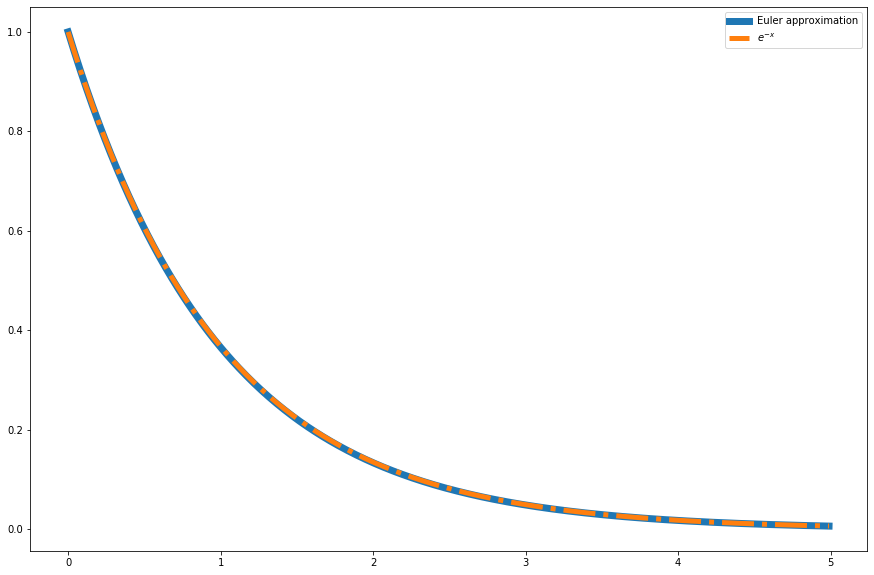

In [7]:
#Part(b): Solve the questions from part (a) usign the euler method:

#i: x = exp(-x)

euler_i = euler(lambda x,t: -x, 1, 5, .01)
x_coords = get_x_coords(.01)

plt.figure(figsize = (15,10))
plt.plot(x_coords, euler_i, linewidth = 7, label = 'Euler approximation')
plt.plot(x_coords, np.exp(-x_coords), '-.', linewidth = 5, label = r'$e^{-x}$')
plt.legend()

$x - \frac{1}{2} x^2$


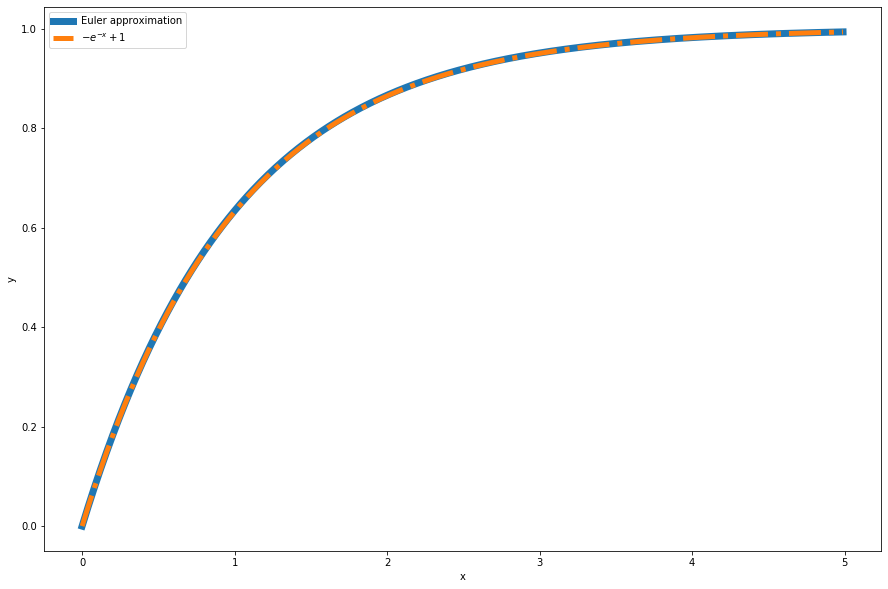

In [8]:
#ii: x = (-e^-x) + 1 

print(r'$x - \frac{1}{2} x^2$')

euler_ii = euler(lambda x,t: 1 - x, 0, 5, 0.01)

plt.figure(figsize = (15,10))
plt.plot(get_x_coords(.01), euler_ii, linewidth = 7, label = 'Euler approximation')
plt.xlabel('x')
plt.ylabel('y')
x_coords = get_x_coords(.01)
plt.plot(x_coords, -np.exp(-x_coords) + 1, '-.', linewidth = 5, label = r'$-e^{-x} + 1$')
plt.legend()
 

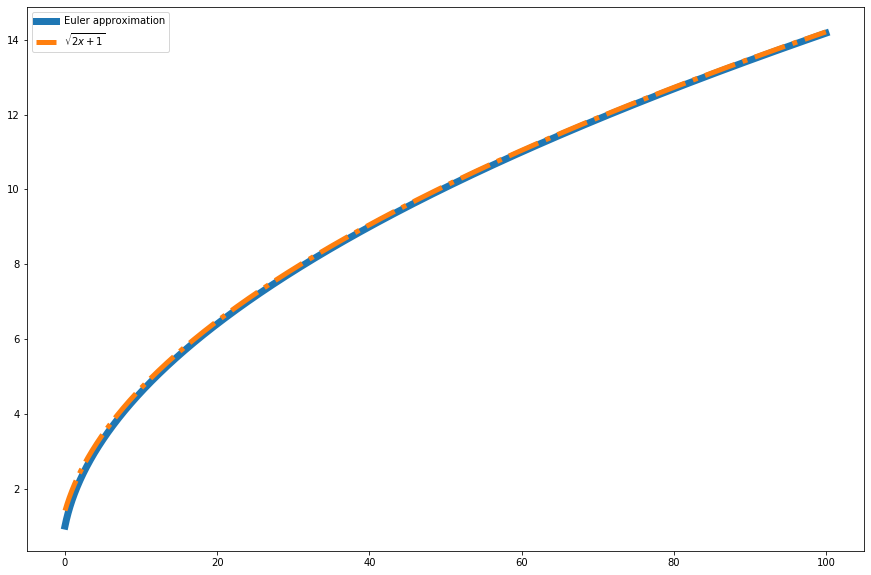

In [14]:
#iii: x = sqrt(2x + 1)

t_max = 100

euler_iii = euler(lambda x,t: x**(-1), 1, t_max, 0.01)
x_coords = get_x_coords(.01)

plt.figure(figsize = (15,10))
plt.plot(x_coords, euler_iii, linewidth = 7, label = 'Euler approximation')
plt.plot(x_coords, np.sqrt(2*x_coords + 2), '-.', linewidth = 5, label = r'$\sqrt{2x + 1}$')
plt.legend()


In the last plot, I chose a bigger x-limit, to show that the method nevertheless converges to the real function. All of these curves show that the Euler method is very good at approximating functions such as the ones considered here.

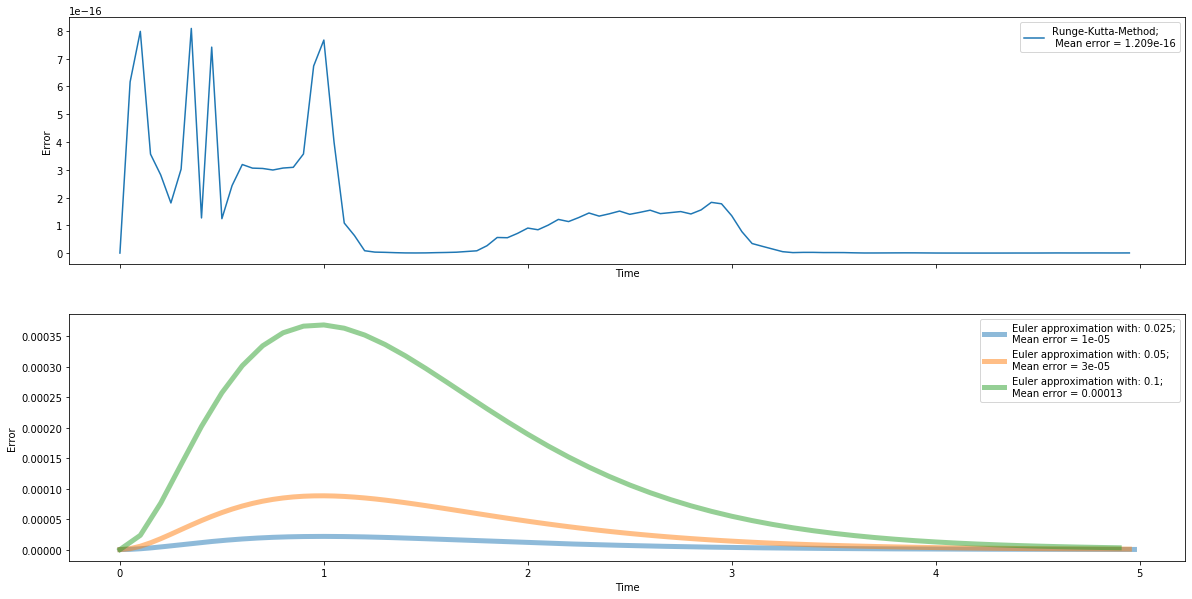

In [530]:
#Part (c): The function of choice is the one from (i):
from scipy import integrate, arange

def f(x, t): return -x
x_0 = 1; t = arange(0, 5, 0.05)
y = integrate.odeint(f, x_0, t)

sq_err = lambda x, y: (x - y)**2
y = y.reshape(100)

t_max = 5

fig, axs = plt.subplots(2,1, sharey = False, sharex = True, figsize = (20,10))

err = sq_err(y, np.exp(-t))
axs[0].plot(t, err, label = 'Runge-Kutta-Method;\n Mean error = {}'.format(round(np.mean(err),20)))
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Error')
axs[0].legend()



for dt in np.array([.025,.05,.1]):
    euler_i_dt = euler(lambda x,t: -x, 1, 5, dt)
    x = get_x_coords(dt)
    err = sq_err(np.exp(-x), euler_i_dt)
    axs[1].plot(x, err, label = 'Euler approximation with: {};\nMean error = {}'. format(dt, round(np.mean(err),5)), 
                linewidth = 5, alpha = .5)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Error')
    axs[1].set_yscale
plt.legend()

The overall mean error of the Euler approximations scales with $dt$. Nevertheless, the euler method converges for all considered choices of $dt$ and for all such choices, the error-curves have comparable shape. The Runge-Kutta-method, however, although its mean error is many orders of magnitude smaller than that of any of the Euler-methods does not converge smoothly against the approximated function.

## 3. Passive membrane:

In [276]:
#Passive membrane equation:

#Membrane Resistance in Ohm:
R_m = 1e7

#External current nA, a := amps:
I = lambda a, t: a * 1e-9

#Resting state in mV:
E_m = -8e-2

#Membrane constant in ms:
tau_m = 10


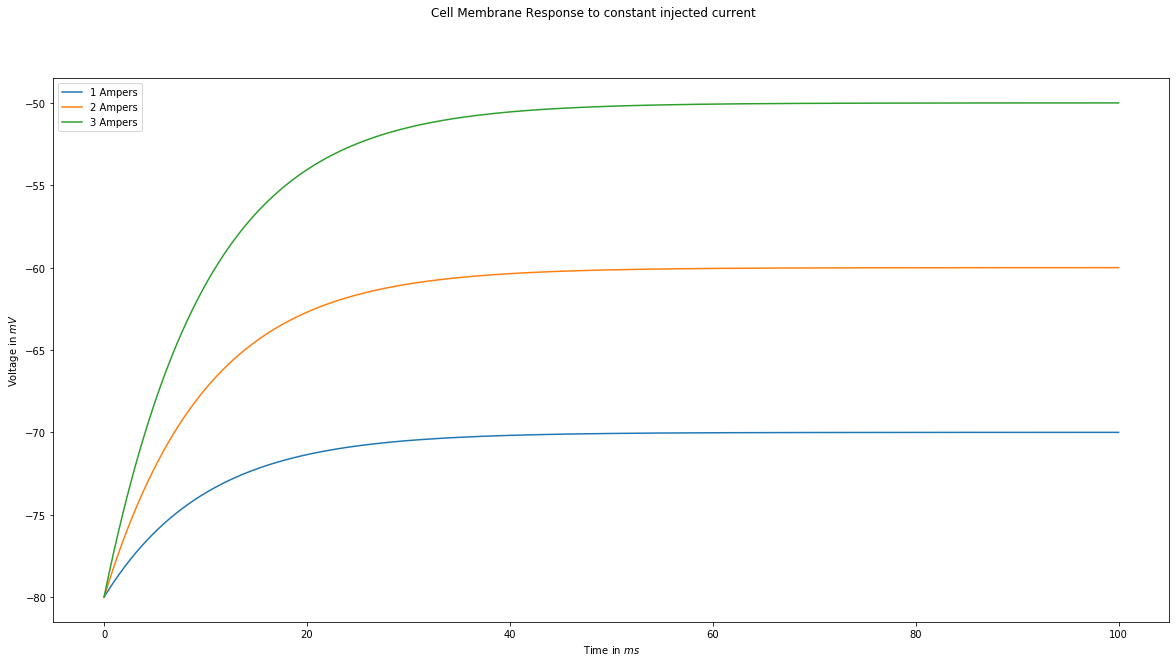

In [329]:
t_max = 100

fig, ax1 = plt.subplots(figsize = (20,10))

plt.suptitle('Cell Membrane Response to constant injected current')

for amps in [1,2,3]:

    V_t = euler(lambda V_t,t: (-V_t + E_m + R_m * I(amps,t)) / tau_m, E_m, t_max, .01)
    x_coords = get_x_coords(.01)
    #Getting things back to mV:
    ax1.plot(x_coords,  1000* V_t, label = '{} Ampers'.format(amps))
    ax1.set_ylabel(r'Voltage in $mV$')
    ax1.set_xlabel(r'Time in $ms$')
    plt.legend()


In [442]:
#Injecting a sinusoidal current:
I_0 = 1 + E_m
I_sinus = lambda t: I_0 * np.sin(2 * np.pi * nu * t) * 1e-6

#Frequencies in Hz:
nu_arr = np.array([1,10,30,50])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


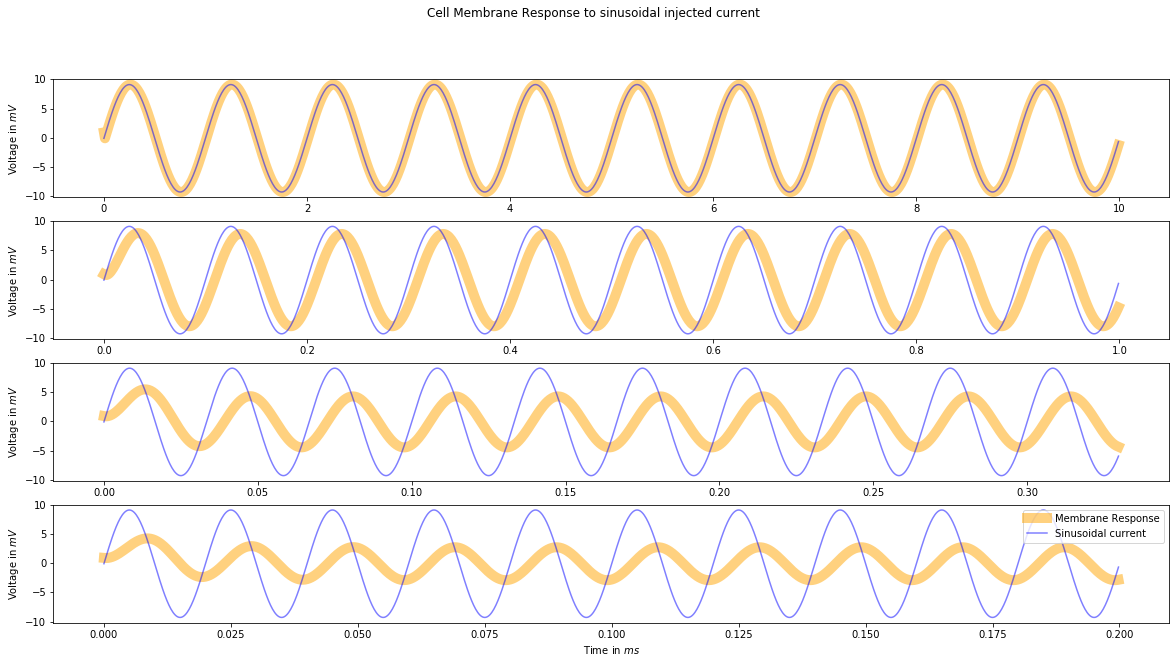

In [443]:
fig, axs = plt.subplots(4,1, figsize = (20,10))

plt.suptitle('Cell Membrane Response to sinusoidal injected current')

for inu, nu in np.ndenumerate(nu_arr):
    
    t_max = np.round (10 / nu, 2)
    dt = t_max / 1000
    #Multiplying by 1000 to cancel out the ms from tau_m and nu:
    V_t_sinus = euler(lambda x, t: 1000*(-x + E_m + R_m * I_sinus(t)) / tau_m, I_0, t_max, dt)
    x_coords = get_x_coords(dt)
    axs[inu].plot(x_coords, V_t_sinus, linewidth = 10, c = 'orange', alpha = .5, label = 'Membrane Response')
    axs[inu].plot
    axs[inu].set_ylabel(r'Voltage in $mV$')
    axs[3].set_xlabel(r'Time in $ms$')
    axs[inu].plot(x_coords, list(map(lambda t: (E_m + R_m * I_sinus(t)), x_coords)), c = 'b', alpha = .5, 
                 label = 'Sinusoidal current')
    plt.legend()


Just for good measure, I have added a 50Hz frequency plot. The sequence of plots shows the membrane response when exposed to sinusoidal currents with different frequencies. As the frequencies increase two things happen: (1) the membrane response weakens. The reason for this – I speculate – is that the membrane is no longer 'given time' to respond to the applied current. There is a timelag between the applied current and the membrane response. So, if the current decays more rapidly as a result of increased stimulus frequency, the membrane response will decay with it before hitting its maximum. And, (2), the phase shift between stimulus and response becomes more pronounced as the frequency increases. This relationship, I guess, is what we will have to probe in exercise $(c)$.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


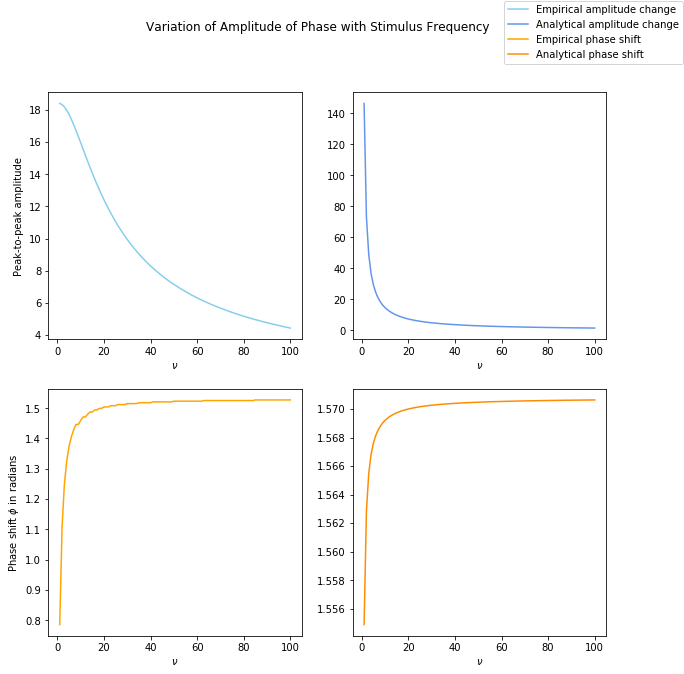

In [517]:
#Part (c):

nu_arr = np.arange(1,101)

#Amplitude: using peak-to-peak amplitude we can calculate np.max - np.min. Analytical solution:

A_nu = lambda nu: I_0 * R_m * np.sqrt(1 / ( 1 + (2 * np.pi * nu * tau_m )**2)) / 1000
analytical_amp = list(map(A_nu, nu_arr))

#Phase shift: Calculate the distance between signal- and response peaks.

analytical_phase = list(map(lambda nu: np.arctan(2 * np.pi * nu * tau_m) , nu_arr))

#Getting it all together – Initializing arrays for collecting plotting values:

amps, phs_shfts, peak_dst = np.zeros(100), np.zeros(100), np.zeros(100)

for inu, nu in np.ndenumerate(nu_arr):
    
    t_max = np.round (10 / nu, 5)
    dt = round(t_max / 1000,15)
    x_coords = get_x_coords(dt)
    driving_signal = list(map(lambda t: (E_m + R_m * I_sinus(t)), x_coords))
    V_t_sinus = euler(lambda x, t: 1000*(-x + E_m + R_m * I_sinus(t)) / tau_m, I_0, t_max, dt)
    
    #Amplitude:
    
    ppA = np.max(V_t_sinus) - np.min(V_t_sinus) 
    
    #Phase shift:
    
    last_phase = V_t_sinus[900:1000]
    r_peak = np.argmax(last_phase)
    last_signal_phase = driving_signal[900:1000]
    s_peak = np.argmax(last_signal_phase)
    
    peak_dst[inu] = r_peak - s_peak
    amps[inu] = ppA
    
#Phase shift: Calculate the distance between signal- and response peaks.
    
fig, axs = plt.subplots(2,2, figsize = (10,10))

plt.suptitle('Variation of Amplitude of Phase with Stimulus Frequency')
    
axs[0,0].plot(nu_arr, amps, c = 'skyblue') 
axs[0,0].set_xlabel (r'$\nu$')
axs[0,0].set_ylabel ('Peak-to-peak amplitude')
axs[0,1].plot(nu_arr, analytical_amp, c = 'cornflowerblue')
axs[0,1].set_xlabel (r'$\nu$')
axs[1,0].plot(nu_arr, np.arctan(peak_dst), c = 'orange')
axs[1,0].set_xlabel (r'$\nu$')
axs[1,0].set_ylabel(r'Phase shift $\phi$ in radians')
axs[1,1].plot(nu_arr, analytical_phase, c = 'darkorange')
axs[1,1].set_xlabel (r'$\nu$')

fig.legend(axs,     # The line objects
           labels=['Empirical amplitude change', 'Analytical amplitude change', 
                  'Empirical phase shift' , 'Analytical phase shift'],
           loc="best",   
           borderaxespad=0.1,      
           )


In both cases the empirical curves confirm the expectations formulated at the end of the last section. Additionally, at least in the case of the phase shift, the empirical and the analytical curves overlap rather nicely. With the amplitude, however, there seems to be a mismatch, both in the qualitative shape of the curve and in the magnitudes. So far, I haven't figured out what the problem is.

In [464]:
a = np.zeros(300)
print(np.argmax(a))

0
